<a href="https://colab.research.google.com/github/Geetanshi-jain/DSAssignmentByGeetanshijain/blob/main/dtapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/unprocess.csv")

data

,ID,Name,Age,Gender,Income,City
0,1,Alice,25,F,50000.0,New York
1,2,Bob,30,Male,60000.0,Los Angeles
2,3,Charlie,35,M,80000.0,Chicago
3,4,David,45,Male,45000.0,New York
4,5,Eva,29,F,NaN,San Francisco
5,6,Frank,50,Male,200000.0,Houston
6,7,Grace,27,Female,75000.0,Miami
7,8,Hank,32,M,70000.0,Boston
8,9,Ivy,28,Female,85000.0,Seattle
9,10,Jack,40,Male,300000.0,Los Angeles


In [2]:
#An index field is a column or value that helps track records uniquely in a dataset.
data['index']= data.index
data

,ID,Name,Age,Gender,Income,City,index
0,1,Alice,25,F,50000.0,New York,0
1,2,Bob,30,Male,60000.0,Los Angeles,1
2,3,Charlie,35,M,80000.0,Chicago,2
3,4,David,45,Male,45000.0,New York,3
4,5,Eva,29,F,NaN,San Francisco,4
5,6,Frank,50,Male,200000.0,Houston,5
6,7,Grace,27,Female,75000.0,Miami,6
7,8,Hank,32,M,70000.0,Boston,7
8,9,Ivy,28,Female,85000.0,Seattle,8
9,10,Jack,40,Male,300000.0,Los Angeles,9


In [4]:
#2. Misleading Field Values

data['gender_processed']= data['Gender'].replace({'M':'Male','F':'Female'})
data

,ID,Name,Age,Gender,Income,City,index,gender_processed
0,1,Alice,25,F,50000.0,New York,0,Female
1,2,Bob,30,Male,60000.0,Los Angeles,1,Male
2,3,Charlie,35,M,80000.0,Chicago,2,Male
3,4,David,45,Male,45000.0,New York,3,Male
4,5,Eva,29,F,NaN,San Francisco,4,Female
5,6,Frank,50,Male,200000.0,Houston,5,Male
6,7,Grace,27,Female,75000.0,Miami,6,Female
7,8,Hank,32,M,70000.0,Boston,7,Male
8,9,Ivy,28,Female,85000.0,Seattle,8,Female
9,10,Jack,40,Male,300000.0,Los Angeles,9,Male


In [6]:
#Re-express Categorical Field Values
# Convert categorical data to numeric

data['gender_numeric']= data['gender_processed'].map({'Male':1,'Female':0})
data


,ID,Name,Age,Gender,Income,City,index,gender_processed,gender_numeric
0,1,Alice,25,F,50000.0,New York,0,Female,0
1,2,Bob,30,Male,60000.0,Los Angeles,1,Male,1
2,3,Charlie,35,M,80000.0,Chicago,2,Male,1
3,4,David,45,Male,45000.0,New York,3,Male,1
4,5,Eva,29,F,NaN,San Francisco,4,Female,0
5,6,Frank,50,Male,200000.0,Houston,5,Male,1
6,7,Grace,27,Female,75000.0,Miami,6,Female,0
7,8,Hank,32,M,70000.0,Boston,7,Male,1
8,9,Ivy,28,Female,85000.0,Seattle,8,Female,0
9,10,Jack,40,Male,300000.0,Los Angeles,9,Male,1


In [7]:
#4 4. Standardise Numeric Fields
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Standardized_Age', 'Standardized_Income']] = scaler.fit_transform(data[['Age', 'Income']])

data


,ID,Name,Age,Gender,Income,City,index,gender_processed,gender_numeric,Standardized_Age,Standardized_Income
0,1,Alice,25,F,50000.0,New York,0,Female,0,-1.151161,-0.707908
1,2,Bob,30,Male,60000.0,Los Angeles,1,Male,1,-0.518655,-0.584196
2,3,Charlie,35,M,80000.0,Chicago,2,Male,1,0.113851,-0.336772
3,4,David,45,Male,45000.0,New York,3,Male,1,1.378863,-0.769764
4,5,Eva,29,F,NaN,San Francisco,4,Female,0,-0.645156,NaN
5,6,Frank,50,Male,200000.0,Houston,5,Male,1,2.011370,1.147773
6,7,Grace,27,Female,75000.0,Miami,6,Female,0,-0.898159,-0.398628
7,8,Hank,32,M,70000.0,Boston,7,Male,1,-0.265653,-0.460484
8,9,Ivy,28,Female,85000.0,Seattle,8,Female,0,-0.771657,-0.274916
9,10,Jack,40,Male,300000.0,Los Angeles,9,Male,1,0.746357,2.384894


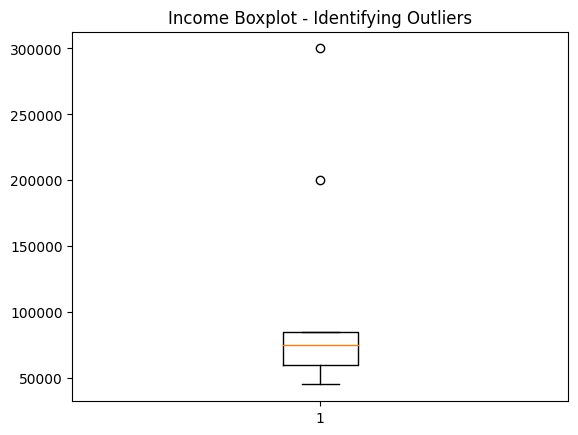

In [8]:
# Identify Outliers

import matplotlib.pyplot as plt

plt.boxplot(data['Income'].dropna())  # Dropping NaN values for income
plt.title('Income Boxplot - Identifying Outliers')
plt.show()